## Example of use

Here we present an example of use for our EEG simulator framework, and using its output to test the python implementation of FourierICA (https://www.cs.helsinki.fi/group/neuroinf/code/fourierica/html/fourierica.html) and the modification the allows to improve its performance.

In [1]:
import sys
sys.path.insert(0,'../src')
from utils import *
from fica import *
from eeggen import *


Initialize the class EEGGenerator. The internal variables of the class control the parameters of the signal.

In [2]:
eegGen = EEGGenerator()
eegGen.calculate()

Calculating and displaying the spectral power of the sources

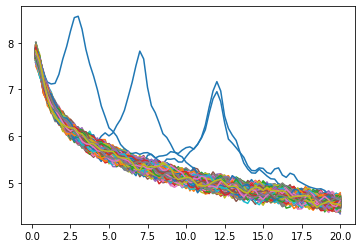

In [3]:
#print(eegdata.shape)
oSc, params = toSpec(eegGen.getSources(), eegGen.Fs, eegGen.minfreq, eegGen.maxfreq,4)

plt.plot(eegGen.ff, np.log(np.squeeze(np.mean(np.abs(oSc),1))))
plt.show()
del oSc

Calculating and displaying the spectral power of the EEG sensors

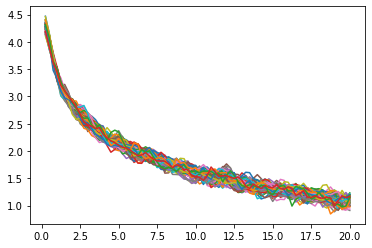

In [4]:
#print(eegdata.shape)
oSc, params = toSpec(eegGen.getEEG(), eegGen.Fs, eegGen.minfreq, eegGen.maxfreq,4)

plt.plot(eegGen.ff, np.log(np.squeeze(np.mean(np.abs(oSc),1))))
plt.show()
del oSc

Outlier removal:
 removed  334  windows

0.00016689700789562778
4.397328691818636e-05
1.8043970567149792e-05
1.0177272124822778e-05
6.389181776755848e-06
6.330053626824039e-06
4.564990230493393e-06
3.1385809116102337e-06
2.8765329777025173e-06
2.01534614063803e-06
1.8315300025495418e-06
1.8530972670793844e-06
1.5733226019776225e-06
1.4738071293374233e-06
1.0920589275098536e-06
6.410532286116322e-07
4.1012067408807695e-07
3.0955328544912675e-07
2.9364502851514374e-07
3.393518268612894e-07
3.6865123786977705e-07
3.287657989181625e-07
2.6482841142261293e-07
2.2749252726050884e-07
2.2311301395294691e-07
2.487736405765162e-07
2.5531651925980725e-07
1.9884824453697547e-07
1.4306941653607907e-07
1.3242802443524937e-07
1.553912589713491e-07
1.7491866477481466e-07
1.61752541694149e-07
1.1989727755068458e-07
7.977169358408531e-08
5.5895991502019626e-08
4.4740900762008096e-08
4.24051371794576e-08
4.815794407697638e-08
6.505247962529381e-08
9.747401696902358e-08
1.3340754778656816e-07
1.4196807551

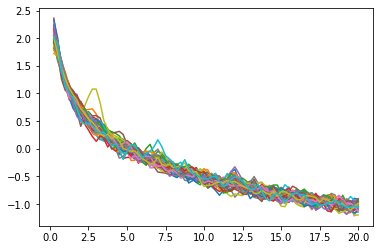

In [5]:
fica = fourierICA(eegGen, 40)
fica.normSpec = False
fica.processEEGGenerator()
X = fica.getResults()

Outlier removal:
 removed  32  windows

0.012298330000989233
7.830939100583745e-05
5.4608377558551524e-05
1.888708422403962e-05
1.095608891021893e-05
4.2736724374936585e-06
5.704384792415418e-06
5.020987793757925e-06
2.377640050732488e-06
7.440887095366833e-07
5.521268766628395e-07
1.055229935431612e-06
9.059851102666272e-07
7.470952698707123e-07
2.6740409758696515e-06
2.124636099942734e-06
1.1987460206697165e-06
4.6981108625665513e-07
3.1122743349154547e-07
3.4278241134444443e-07
5.603596058278981e-07
1.398114357398228e-06
5.741563524397364e-06
1.0587799289529798e-06
1.3532131710736195e-06
2.919099196807551e-06
2.061592350721675e-06
4.125643279229152e-07
1.902450433854952e-07
7.849468841580887e-08

Converged.

get results with X = fica.getResults()


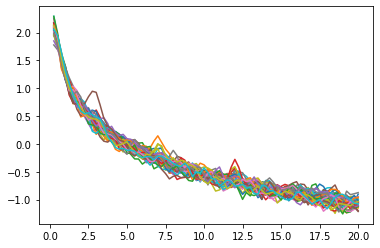

In [6]:
fica2 = fourierICA(eegGen, 40)
fica2.normSpec = True
fica2.processEEGGenerator()
X = fica2.getResults()